# Imports

In [9]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.feature_extraction.text import CountVectorizer

# Paths
PROJECT_ROOT = Path("../")  # notebook relative path
DATA_DIR = PROJECT_ROOT / "data"
CLEAN_DATA_PATH = DATA_DIR / "clean_news.parquet"
FIGS_DIR = PROJECT_ROOT / "outputs/figs"
FIGS_DIR.mkdir(parents=True, exist_ok=True)

# Load cleaned news data
news_df = pd.read_parquet(CLEAN_DATA_PATH)
news_df.head()


,headline,url,publisher,date,stock,headline_length_chars,headline_length_tokens,headline_lower,date_only
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A,39,7,stocks that hit 52-week highs on friday,2020-06-05
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A,42,7,stocks that hit 52-week highs on wednesday,2020-06-03
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A,29,5,71 biggest movers from friday,2020-05-26
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 16:45:06+00:00,A,44,7,46 stocks moving in friday's mid-day session,2020-05-22
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 15:38:59+00:00,A,87,14,b of a securities maintains neutral on agilent...,2020-05-22


# Headline Length Statistics

       headline_length_chars  headline_length_tokens
count           1.407328e+06            1.407328e+06
mean            7.312051e+01            1.141671e+01
std             4.073531e+01            6.352997e+00
min             3.000000e+00            1.000000e+00
25%             4.700000e+01            7.000000e+00
50%             6.400000e+01            1.000000e+01
75%             8.700000e+01            1.300000e+01
max             5.120000e+02            7.700000e+01


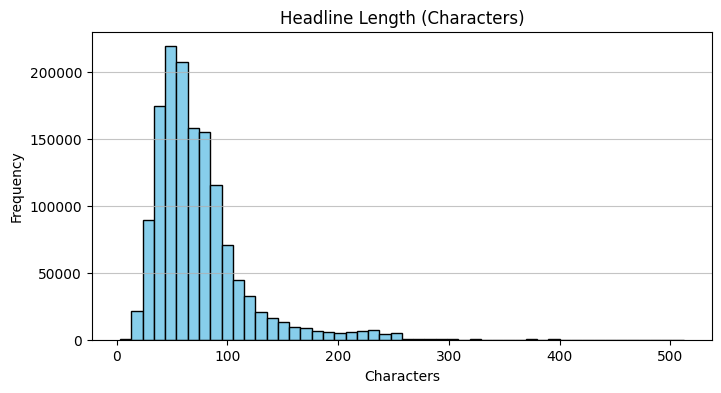

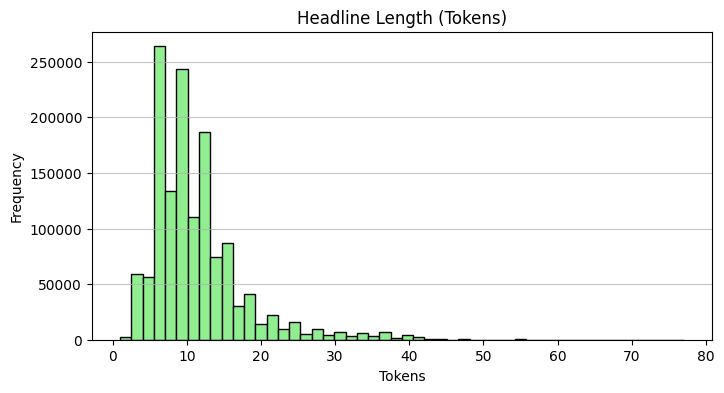

In [10]:
# Descriptive stats
stats = news_df[['headline_length_chars', 'headline_length_tokens']].describe()
print(stats)

# Histogram of headline lengths (chars)
plt.figure(figsize=(8,4))
plt.hist(news_df['headline_length_chars'], bins=50, color='skyblue', edgecolor='black')
plt.title("Headline Length (Characters)")
plt.xlabel("Characters")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)
plt.savefig(FIGS_DIR / "headline_length_chars_hist.png")
plt.show()

# Histogram of headline lengths (tokens)
plt.figure(figsize=(8,4))
plt.hist(news_df['headline_length_tokens'], bins=50, color='lightgreen', edgecolor='black')
plt.title("Headline Length (Tokens)")
plt.xlabel("Tokens")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)
plt.savefig(FIGS_DIR / "headline_length_tokens_hist.png")
plt.show()

# Top Keywords

In [11]:
# Convert headlines to lowercase
headlines_lower = news_df['headline_lower'].fillna('')

# Extract unigrams and bigrams appearing in at least 5 headlines
vectorizer = CountVectorizer(ngram_range=(1,2), min_df=5, stop_words='english')
X = vectorizer.fit_transform(headlines_lower)

# Sum word counts
sums = X.sum(axis=0)
terms = [(term, sums[0, idx]) for term, idx in vectorizer.vocabulary_.items()]
top_terms = sorted(terms, key=lambda x: x[1], reverse=True)[:30]

# Display top 30 keywords/bigrams
top_terms

[('vs', np.int64(162099)),
 ('stocks', np.int64(161776)),
 ('est', np.int64(140604)),
 ('eps', np.int64(128897)),
 ('market', np.int64(120558)),
 ('shares', np.int64(114313)),
 ('reports', np.int64(108710)),
 ('update', np.int64(91723)),
 ('earnings', np.int64(87399)),
 ('sales', np.int64(79645)),
 ('benzinga', np.int64(74516)),
 ('pt', np.int64(73068)),
 ('week', np.int64(69572)),
 ('announces', np.int64(66591)),
 ('price', np.int64(64407)),
 ('buy', np.int64(64371)),
 ('mid', np.int64(62263)),
 ('downgrades', np.int64(61959)),
 ('trading', np.int64(61182)),
 ('raises', np.int64(57802)),
 ('52', np.int64(56972)),
 ('upgrades', np.int64(56811)),
 ('target', np.int64(54714)),
 ('maintains', np.int64(52961)),
 ('52 week', np.int64(51006)),
 ('higher', np.int64(48286)),
 ('new', np.int64(48228)),
 ('00', np.int64(47468)),
 ('price target', np.int64(47274)),
 ('day', np.int64(46141))]

# Publisher Counts

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Vick Meyer            24826
webmaster             20313
Benzinga_Newsdesk     19410
Zacks                 19390
Jayson Derrick        19050
Allie Wickman         18317
Shanthi Rexaline      16640
Craig Jones           16221
Wayne Duggan          12897
Nelson Hem            12590
Name: count, dtype: int64


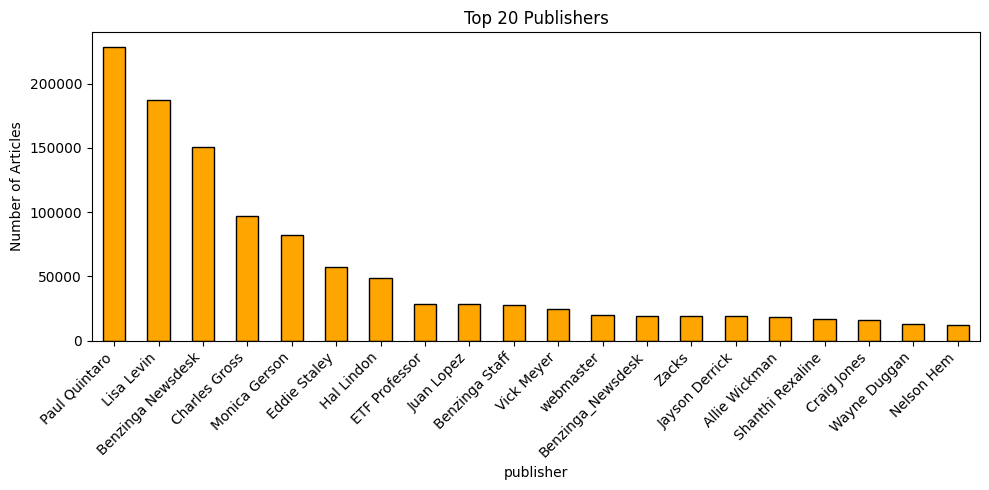

In [12]:
publisher_counts = news_df['publisher'].value_counts().head(20)
print(publisher_counts)

# Plot
plt.figure(figsize=(10,5))
publisher_counts.plot(kind='bar', color='orange', edgecolor='black')
plt.title("Top 20 Publishers")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(FIGS_DIR / "top_20_publishers.png")
plt.show()

# Stock Ticker Counts

stock
MRK     3333
MS      3238
NVDA    3146
MU      3142
QQQ     3106
NFLX    3028
M       3025
EBAY    3018
GILD    2968
VZ      2966
QCOM    2941
JNJ     2928
DAL     2926
BABA    2858
KO      2797
AA      2739
EWU     2702
ORCL    2701
FDX     2629
HD      2612
Name: count, dtype: int64


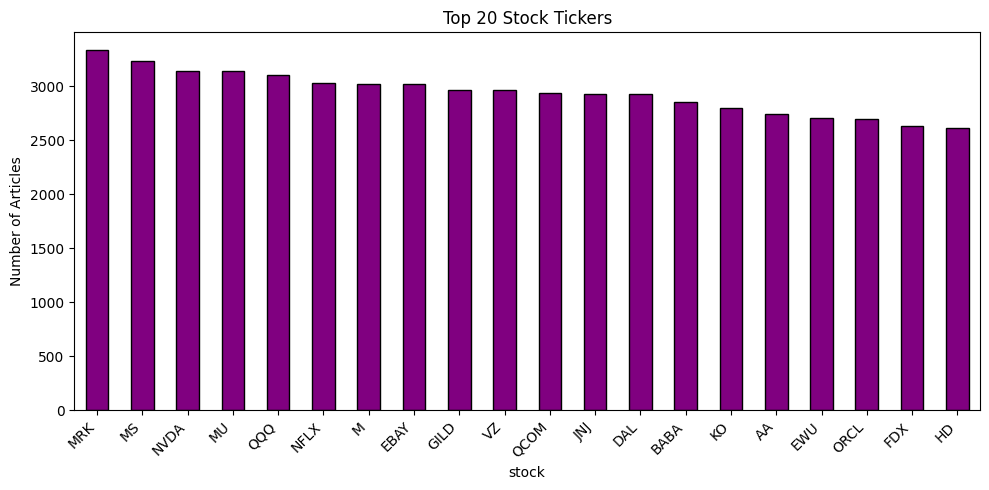

In [13]:
ticker_counts = news_df['stock'].value_counts().head(20)
print(ticker_counts)

# Plot
plt.figure(figsize=(10,5))
ticker_counts.plot(kind='bar', color='purple', edgecolor='black')
plt.title("Top 20 Stock Tickers")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(FIGS_DIR / "top_20_stocks.png")
plt.show()

# Daily Article Trends

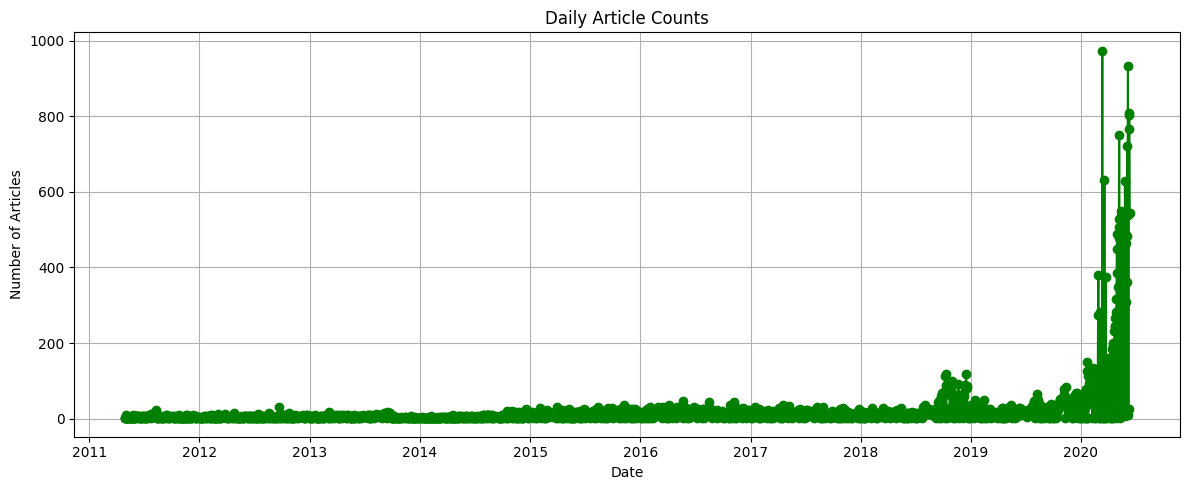

In [14]:
# Group by date_only
daily_counts = news_df.groupby('date_only').size()

plt.figure(figsize=(12,5))
daily_counts.plot(color='green', marker='o')
plt.title("Daily Article Counts")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.grid(True)
plt.tight_layout()
plt.savefig(FIGS_DIR / "daily_article_counts.png")
plt.show()

# Rolling Spike Detection

Spike Dates: Index([2011-05-25, 2011-12-10, 2012-02-29, 2012-09-21, 2012-11-12, 2013-03-05,
       2013-10-07, 2013-10-31, 2013-12-02, 2014-01-21, 2014-03-03, 2014-03-12,
       2014-04-22, 2015-01-06, 2015-03-30, 2015-07-24, 2016-04-05, 2016-08-15,
       2017-06-05, 2017-08-28, 2018-06-29, 2018-10-23, 2019-01-11, 2020-03-12,
       2020-03-19],
      dtype='object', name='date_only')


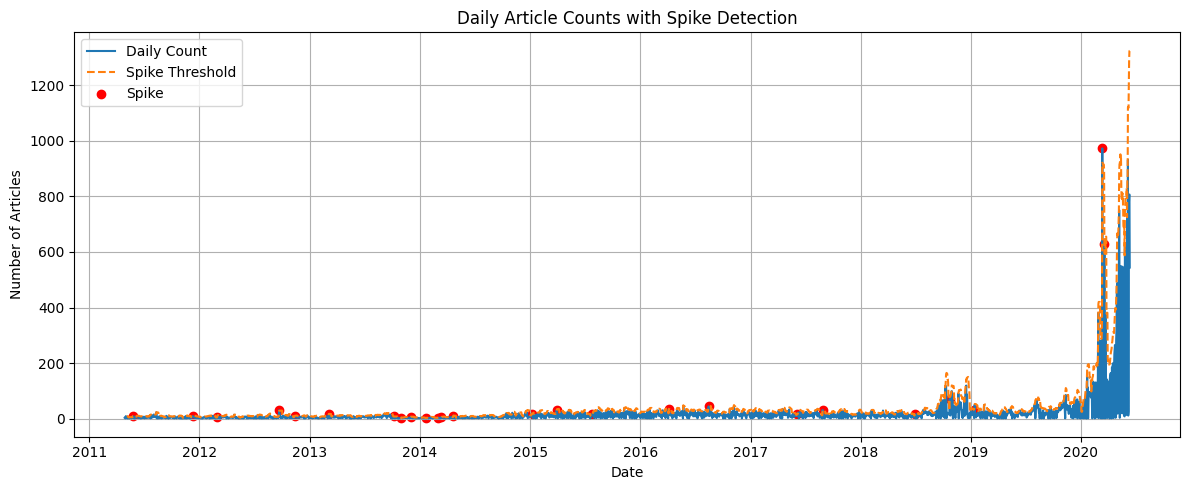

In [15]:
rolling_window = 7
rolling_mean = daily_counts.rolling(rolling_window).mean()
rolling_std = daily_counts.rolling(rolling_window).std()
threshold = rolling_mean + 2*rolling_std

spike_dates = daily_counts[daily_counts > threshold].index
print("Spike Dates:", spike_dates)

plt.figure(figsize=(12,5))
daily_counts.plot(label="Daily Count")
threshold.plot(label="Spike Threshold", linestyle='--')
plt.scatter(spike_dates, daily_counts[spike_dates], color='red', label='Spike')
plt.title("Daily Article Counts with Spike Detection")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(FIGS_DIR / "daily_spikes.png")
plt.show()